---

# NYC Taxi Trip Duration Project

---

## Final Project: Building Basic predictive models over the NYC Taxi Trip dataset.

### You are provided with the NYC Taxi Trip Dataset. This dataset contains information about the taxi trips that took place in different parts of New York City and how much time did that trip take to complete.

### In this project, the following are the tasks you must complete and submitted.
1. Choose the most suitable evaluation metric and state why you chose it.
2. Build a benchmark model for the given dataset.
3. Build a K-Nearest neighbours’ model for the given dataset and find the best value of 
K.
4. Build a Linear model for the given dataset with regularisation. Attempt to interpret 
the variable coefficients of the Linear Model.
5. Build a Decision tree model for the given dataset. Attempt to interpret the variable 
importance.
6. Plot the following Bar plots:
    1. train score of all the above models.
    2. test (not validation!) score of all the above models.
    3. Attempt to explain the observations from the plots (optional)

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
sns.set()

**Reading the csv file**

In [2]:
data = pd.read_csv("nyc_taxi_trip_duration.csv")

**Checking the shape of dataset**

In [3]:
data.shape

(729322, 11)

**Checking first few rows of dataset**

In [4]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


**Checking if all id values are unique**

In [5]:
if data.id.nunique() == data.shape[0]:
    print("All id values are unique")

All id values are unique


**Checking for missing values**

In [6]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

**Checking data types of the different features**

In [7]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

**Correcting the datatypes**

In [8]:
# pick-up datetime and dropoff_datetime should be datetime objects
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [9]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

**Checking if the trip_duration matches with the difference of dropoff time and pickup time**

In [10]:
duration_diff = (data['trip_duration'] - ((data['dropoff_datetime'] - data['pickup_datetime']).map(lambda x: x.total_seconds()))).sum()
duration_diff

0.0

* The trip_duration is consistent with the pickup time and dropoff time.

**Creating pickup day of month, pickup day of week, and pickup hour features as these could be helpul for further analysis**

In [11]:
data['pickup_day'] = data.pickup_datetime.dt.day
data['pickup_dayow'] = data.pickup_datetime.dt.strftime('%A')
data['pickup_dow'] = data.pickup_datetime.dt.dayofweek

In [12]:
data['pickup_hour'] = data.pickup_datetime.dt.hour

In [13]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_dayow,pickup_dow,pickup_hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,29,Monday,0,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,11,Friday,4,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,21,Sunday,6,17
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,5,Tuesday,1,9
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,17,Wednesday,2,6


**Shuffling and creating train and test data set**

In [14]:
from sklearn.utils import shuffle

# Shuffling the Dataset
data = shuffle(data, random_state = 42)

#creating 4 divisions
div = int(data.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = data[:(3*div+1)]
test = data[3*div+1:]

In [15]:
train.shape

(546991, 15)

In [16]:
test.shape

(182331, 15)

## EDA

**The EDA will be carried out on the training data set only to avoid any data leakage to the test dataset.**

---
### Univariate Analysis

**Getting an overview of the continuous data**

In [17]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day,pickup_dow,pickup_hour
count,546991.000000,546991.000000,546991.000000,546991.000000,546991.000000,546991.000000,5.469910e+05,546991.000000,546991.000000,546991.000000
mean,1.535572,1.664185,-73.973443,40.750949,-73.973383,40.751765,9.506093e+02,15.513158,3.051443,13.614048
std,0.498733,1.314420,0.042147,0.034114,0.041840,0.035733,4.055395e+03,8.697283,1.955310,6.405899
min,1.000000,0.000000,-79.569733,34.712234,-80.355431,32.181141,1.000000e+00,1.000000,0.000000,0.000000
25%,1.000000,1.000000,-73.991852,40.737339,-73.991341,40.735851,3.970000e+02,8.000000,1.000000,9.000000
50%,2.000000,1.000000,-73.981720,40.754086,-73.979767,40.754517,6.630000e+02,15.000000,3.000000,14.000000
75%,2.000000,2.000000,-73.967346,40.768326,-73.963028,40.769741,1.076000e+03,23.000000,5.000000,19.000000
max,2.000000,6.000000,-65.897385,51.881084,-65.897385,43.911762,1.939736e+06,31.000000,6.000000,23.000000


* The trip duration has a very wide range and thus might contain outliers. Needs to be checked further.

<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

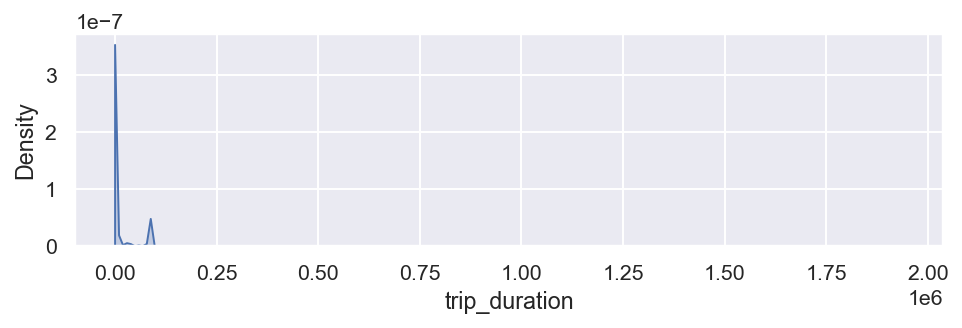

In [18]:
# setting image resolution
plt.figure(figsize = (8,2) , dpi = 140)

# Plotting histogram and descriptive summary
sns.kdeplot(train['trip_duration'], shade = True)

**Because of the presense of outliers, log of trip_duration would be helpful in understanding the distribution.**

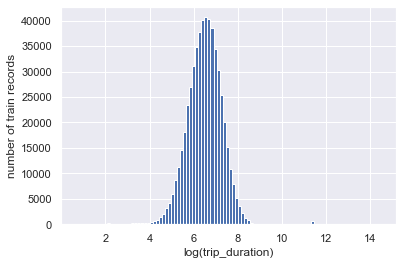

In [19]:
log_trip_duration = np.log(train['trip_duration'] + 1)
plt.hist(log_trip_duration.values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

In [20]:
(train['trip_duration']/3600).describe() # Trip duration in hours

count    546991.000000
mean          0.264058
std           1.126499
min           0.000278
25%           0.110278
50%           0.184167
75%           0.298889
max         538.815556
Name: trip_duration, dtype: float64

<AxesSubplot:xlabel='trip_duration'>

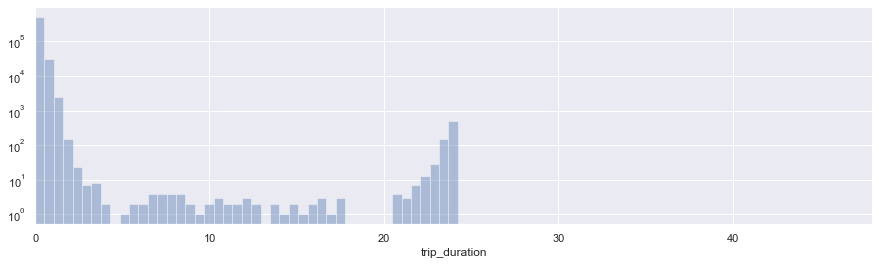

In [21]:
fig, ax = plt.subplots(figsize = (15,4), ncols=1, nrows=1)
ax.set_xlim(0,48)
sns.distplot(train['trip_duration']/3600,ax=ax,bins=1000,kde=False, hist_kws={'log':True})

* We can see that most of the trips are withing the 24 hour duration, and the no. of trips increase with duration of about 24 hours, maybe because the meter resets at midnight, and maybe the drivers forget to reset their meters.
* We will restrict the trip duration to less than 22 hours for the reason stated above.
* There are a large number of trips with duration less than an hour. It would be good to have a deeper look at it.

In [22]:
train = train[train['trip_duration'] < (3600*22)]

<AxesSubplot:xlabel='trip_duration'>

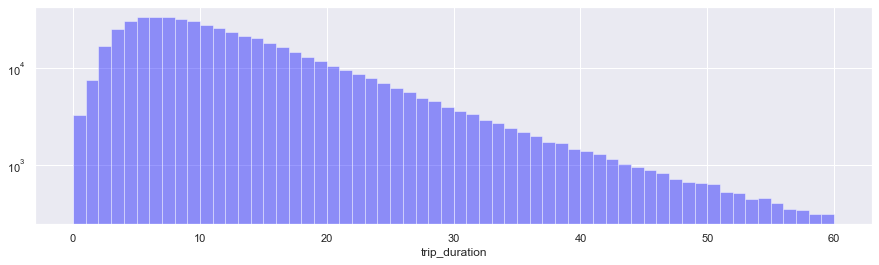

In [23]:
fig, ax = plt.subplots(figsize = (15,4), ncols=1, nrows=1)
hour_data = train[train['trip_duration'] < 3600]
sns.distplot(hour_data['trip_duration']/60,ax=ax,bins=60,kde=False, hist_kws={'log':True}, color = 'blue')

* We can see that there are a number of trips with duration less than 60 seconds, which is highly improbable in real life. So, we'll remove those trips with trip_duration less than 60.

In [24]:
(train['trip_duration'] < 60).value_counts()

False    543102
True       3210
Name: trip_duration, dtype: int64

In [25]:
train = train[train['trip_duration'] > 60]

In [26]:
train.shape

(543027, 15)

**Checking the range for pickup and dropoff times**

In [27]:
train['pickup_datetime'].min()

Timestamp('2016-01-01 00:01:14')

In [28]:
train['pickup_datetime'].max()

Timestamp('2016-06-30 23:59:37')

In [29]:
train['dropoff_datetime'].min()

Timestamp('2016-01-01 00:05:54')

In [30]:
train['dropoff_datetime'].max()

Timestamp('2016-07-01 00:46:37')

* The data is for a period of six months. The day of the month, and the day of the week might provide us some insights to predict the trip duration. 

**Checking values of store and fwd flag**

In [31]:
train.store_and_fwd_flag.value_counts()

N    540050
Y      2977
Name: store_and_fwd_flag, dtype: int64

In [32]:
# This feature could provide some insights at the later stage, so we can convert it into a numerical variable
train['store_and_fwd_flag'] = 1 * (train.store_and_fwd_flag.values == 'Y')

In [33]:
train.store_and_fwd_flag.value_counts(normalize = True)

0    0.994518
1    0.005482
Name: store_and_fwd_flag, dtype: float64

In [34]:
# Analysing Vendor Id
train['vendor_id'].value_counts(normalize=True)

2    0.535692
1    0.464308
Name: vendor_id, dtype: float64

In [35]:
# Analysing passenger counts
train['passenger_count'].value_counts()

1    384683
2     78452
5     29063
3     22228
6     18060
4     10532
0         9
Name: passenger_count, dtype: int64

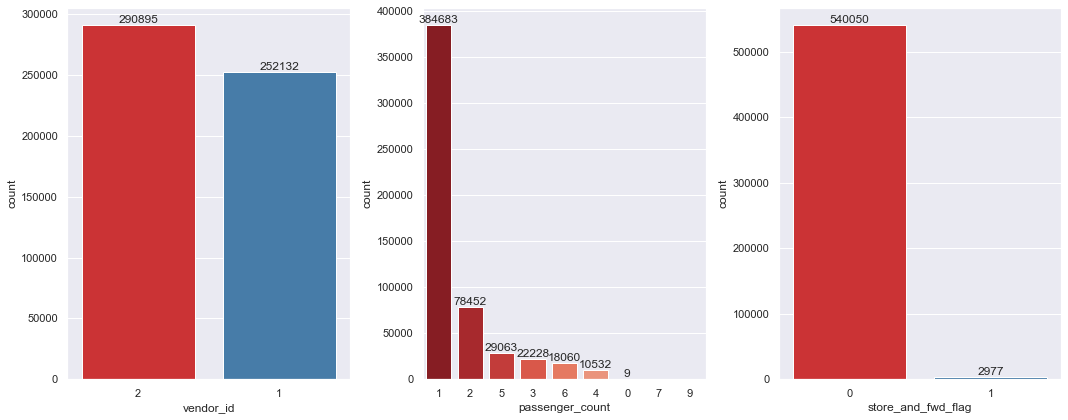

In [36]:
# Plotting vendor id, passenger counts, and store and fwd flag

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,6))

sns.countplot(x="vendor_id", data=train, palette="Set1", ax = ax1, order = data['vendor_id'].value_counts().index)
sns.countplot(x="passenger_count", data=train, palette="Reds_r", ax = ax2, order = data['passenger_count'].value_counts().index)
sns.countplot(x="store_and_fwd_flag", data=train, palette="Set1", ax = ax3)

ax1.bar_label(container=ax1.containers[0])
ax2.bar_label(container=ax2.containers[0])
ax3.bar_label(container=ax3.containers[0])

fig.tight_layout()

* Vendor 2 has more number of trips compared to vendor 1.
* Most of the trips have 1 passengers.
* We can see that there are a few rides with the passenger_count as zero. We need to remove these from our training set.

In [37]:
train = train[train['passenger_count'] != 0]

In [38]:
train.shape

(543018, 15)

Text(0, 0.5, 'Total number of pickups')

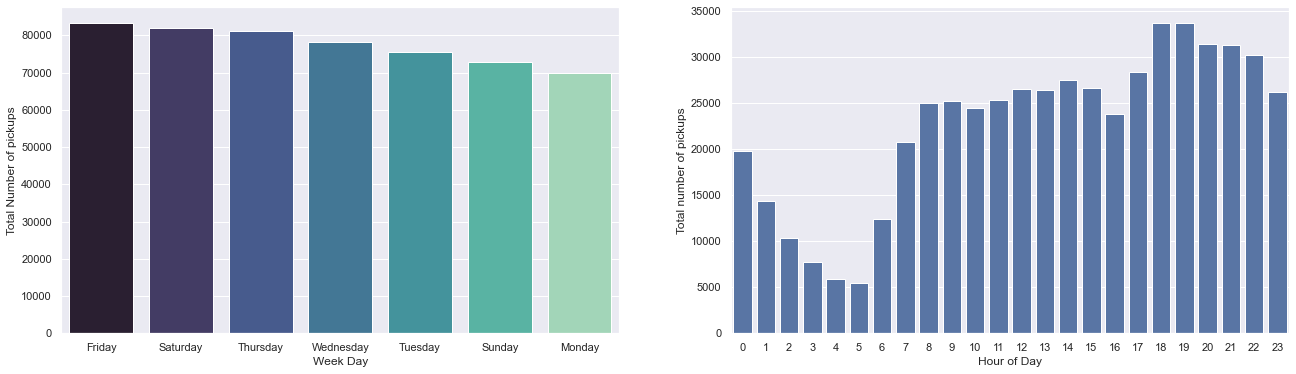

In [39]:
plt.figure(figsize=(22, 6))

# Plotting pickups by day of week
plt.subplot(121)
sns.countplot(train['pickup_dayow'], order = train['pickup_dayow'].value_counts().index, palette="mako")
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')

# Plotting pickups by hour of day
plt.subplot(122)
sns.countplot(train['pickup_hour'], color = 'b')
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')

* We can see that the least number of pickups happen on Mondays while Fridays have the highest number of pickups.
* Early morning pickups are low, and pickups are more after 08:00 AM which can be considered as the start of work hours.

___
### Bivariate and multivariate analysis

In [40]:
grouped_data1 = train.groupby(['pickup_hour', 'vendor_id'])['trip_duration'].mean().reset_index()
grouped_data2 = train.groupby(['pickup_dow', 'vendor_id'])['trip_duration'].mean().reset_index()

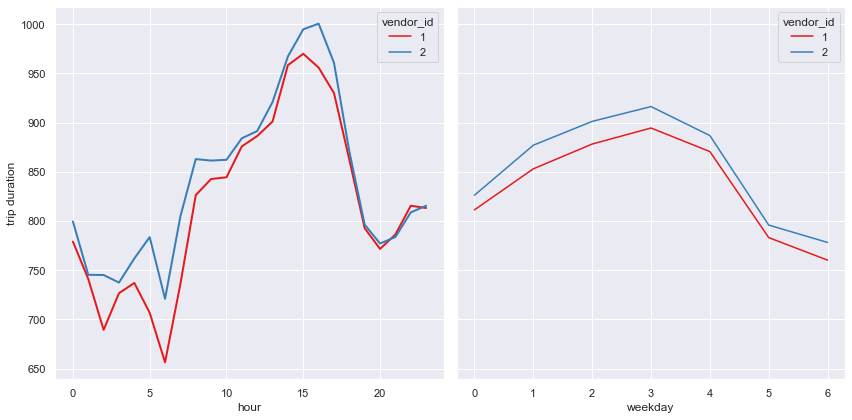

In [41]:
fig, ax = plt.subplots(ncols=2, figsize = (12,6), sharey=True)
sns.lineplot(data = grouped_data1, x = 'pickup_hour', y = 'trip_duration', hue = 'vendor_id', palette = 'Set1', lw=2, ax = ax[0])
sns.lineplot(data = grouped_data2, x = 'pickup_dow', y = 'trip_duration', hue = 'vendor_id', palette = 'Set1', ax = ax[1])

ax[0].set_xlabel('hour')
ax[1].set_xlabel('weekday')
ax[0].set_ylabel('trip duration')

fig.tight_layout()

* Trip durations are definitely shorter for late night and early morning hours that can be attributed to low traffic density
* It follows a similar pattern when compared to number of pickups indicating a correlation between number of pickups and trip duration
* Trip durations are particularly low on Saturday(5) and Sunday(6).
* Trip durations for vendor 2 are on an average higher than trip durations for vendor 1 on all days.

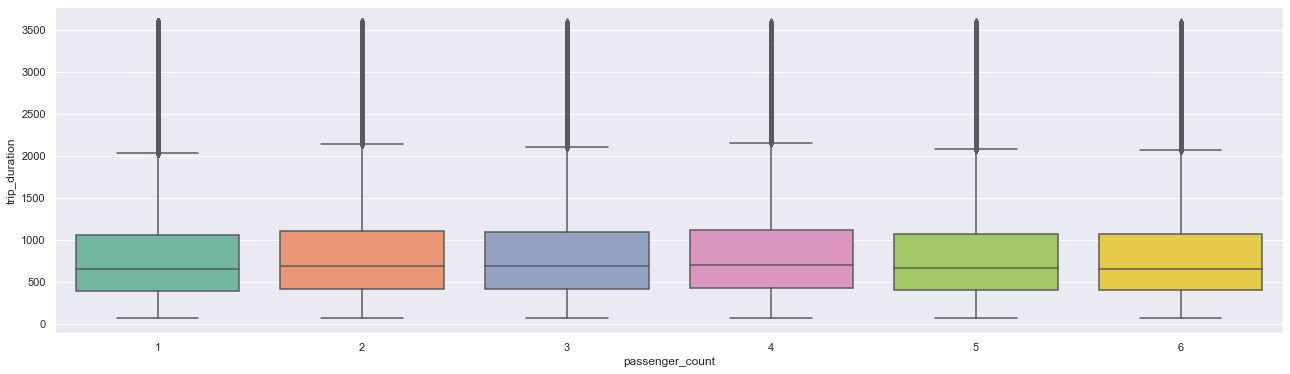

In [128]:
train.passenger_count.value_counts()
plt.figure(figsize=(22, 6))
train_sub = train[train['trip_duration'] < 3600]
sns.boxplot(x="passenger_count", y="trip_duration", data=train_sub, palette = 'Set2')
plt.show()

* The boxplot clearly shows that there is not much of a difference in distribution for the most frequently occuring passenger count values.

In [42]:
train[['pickup_longitude','pickup_latitude']].describe()

,pickup_longitude,pickup_latitude
count,543018.000000,543018.000000
mean,-73.973567,40.750996
std,0.041523,0.033848
min,-79.569733,34.712234
25%,-73.991859,40.737400
50%,-73.981735,40.754116
75%,-73.967438,40.768330
max,-65.897385,51.881084


* We have outliers in latitude and longitude as well.

In [43]:
xlong = train['pickup_longitude'].mean()
x_sd = train['pickup_longitude'].std()
ylat = train['pickup_latitude'].mean()
y_sd = train['pickup_latitude'].std()

* We'll take points only within the +/- 3 sigma range to visualise the coordinates as this will eliminate the outliers.

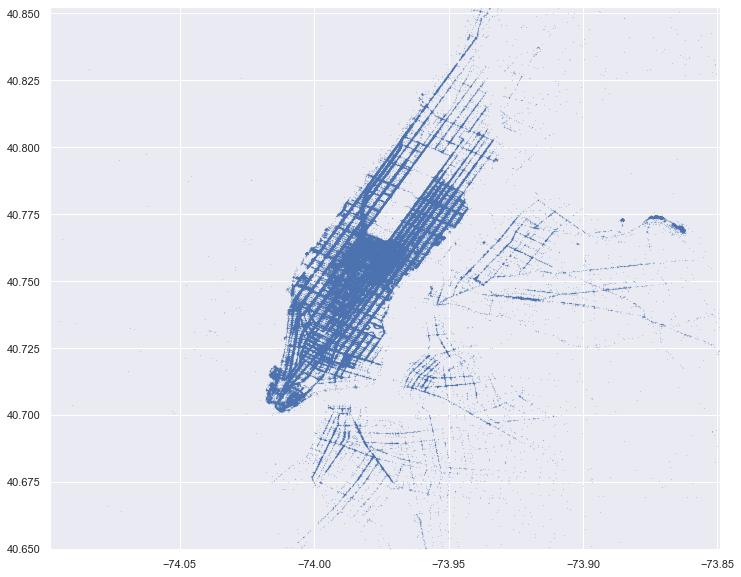

In [44]:
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(12,10))
plt.ylim(ylat - 3*y_sd, ylat + 3*y_sd)
plt.xlim(xlong - 3*x_sd, xlong + 3*x_sd)
ax.scatter(train['pickup_longitude'],train['pickup_latitude'], s=0.01, alpha=1)

In [45]:
train1 = train.loc[(train.pickup_latitude > 40.6) & (train.pickup_latitude < 40.9)]
train1 = train.loc[(train.pickup_longitude > -74.05) & (train.pickup_longitude < -73.7)]
test1 = test.loc[(test.pickup_latitude > 40.6) & (test.pickup_latitude < 40.9)]
test1 = test.loc[(test.pickup_longitude > -74.05) & (test.pickup_longitude < -73.7)]

#### Clustering the pickup locations

In [46]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [47]:
geometry = [Point(xy) for xy in zip(train1['pickup_longitude'], train1['pickup_latitude'])]
geometry[:3]

In [48]:
geo_df = gpd.GeoDataFrame(train1, crs = {'init': 'epsg:4326'}, geometry = geometry)
geo_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_dayow,pickup_dow,pickup_hour,geometry
469114,id2380741,2,2016-05-21 10:40:14,2016-05-21 10:51:11,1,-73.981796,40.762035,-73.972267,40.781265,0,657,21,Saturday,5,10,POINT (-73.98180 40.76204)
694852,id3946961,2,2016-01-08 18:49:27,2016-01-08 18:52:42,5,-73.980965,40.747677,-73.982704,40.741161,0,195,8,Friday,4,18,POINT (-73.98096 40.74768)
696324,id0833913,1,2016-05-22 00:54:10,2016-05-22 01:08:10,1,-73.951065,40.782722,-73.867691,40.833664,0,840,22,Sunday,6,0,POINT (-73.95107 40.78272)
356496,id1336849,1,2016-06-11 10:32:12,2016-06-11 10:38:50,1,-73.987625,40.762791,-73.973518,40.762909,0,398,11,Saturday,5,10,POINT (-73.98763 40.76279)
645318,id1610858,1,2016-04-03 10:45:51,2016-04-03 10:57:13,3,-73.964333,40.792503,-73.988609,40.758369,0,682,3,Sunday,6,10,POINT (-73.96433 40.79250)


In [49]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 50)
df_pick = train1[['pickup_longitude', 'pickup_latitude']]
df_drop = train1[['dropoff_longitude','dropoff_latitude']]

k_means.fit(df_pick)

KMeans(n_clusters=50)

In [50]:
clust_pick = k_means.labels_
train1['label_pick'] = clust_pick.tolist()
train1['label_drop'] = k_means.predict(df_drop)

centroid_pickups = pd.DataFrame(k_means.cluster_centers_, columns = ['centroid_pick_long', 'centroid_pick_lat'])
centroid_dropoff = pd.DataFrame(k_means.cluster_centers_, columns = ['centroid_drop_long', 'centroid_drop_lat'])

centroid_pickups.shape
centroid_pickups['label_pick'] = centroid_pickups.index
centroid_dropoff['label_drop'] = centroid_dropoff.index

train1 = pd.merge(train1, centroid_pickups, how='left', on=['label_pick'])
train1 = pd.merge(train1, centroid_dropoff, how='left', on=['label_drop'])
train1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_dayow,pickup_dow,pickup_hour,geometry,label_pick,label_drop,centroid_pick_long,centroid_pick_lat,centroid_drop_long,centroid_drop_lat
0,id2380741,2,2016-05-21 10:40:14,2016-05-21 10:51:11,1,-73.981796,40.762035,-73.972267,40.781265,0,...,Saturday,5,10,POINT (-73.98180 40.76204),38,6,-73.983359,40.760075,-73.975802,40.785259
1,id3946961,2,2016-01-08 18:49:27,2016-01-08 18:52:42,5,-73.980965,40.747677,-73.982704,40.741161,0,...,Friday,4,18,POINT (-73.98096 40.74768),41,27,-73.984882,40.748567,-73.986176,40.740103
2,id0833913,1,2016-05-22 00:54:10,2016-05-22 01:08:10,1,-73.951065,40.782722,-73.867691,40.833664,0,...,Sunday,6,0,POINT (-73.95107 40.78272),21,28,-73.951353,40.785373,-73.880228,40.858799
3,id1336849,1,2016-06-11 10:32:12,2016-06-11 10:38:50,1,-73.987625,40.762791,-73.973518,40.762909,0,...,Saturday,5,10,POINT (-73.98763 40.76279),38,5,-73.983359,40.760075,-73.975115,40.762067
4,id1610858,1,2016-04-03 10:45:51,2016-04-03 10:57:13,3,-73.964333,40.792503,-73.988609,40.758369,0,...,Sunday,6,10,POINT (-73.96433 40.79250),23,30,-73.969782,40.793316,-73.989807,40.757323


In [51]:
summary_avg_time = pd.DataFrame(train1.groupby('label_pick')['trip_duration'].mean())
summary_avg_time.reset_index(inplace = True)
summary_pref_clus = pd.DataFrame(train1.groupby(['label_pick', 'label_drop'])['id'].count())
summary_pref_clus = summary_pref_clus.reset_index()
summary_pref_clus = summary_pref_clus.loc[summary_pref_clus.groupby('label_pick')['id'].idxmax()]
summary =pd.merge(summary_avg_time, summary_pref_clus, how = 'left', on = 'label_pick')
summary = summary.rename(columns={'trip_duration':'avg_triptime'})
summary.head()

,label_pick,avg_triptime,label_drop,id
0,0,817.360420,22,2001
1,1,2594.393606,38,236
2,2,707.563587,14,1282
3,3,1930.848292,38,378
4,4,815.173536,12,1019


In [52]:
# Summary of distribution of data over 50 clusters
summary_full_data = pd.DataFrame(train1.groupby('label_pick')['id'].count())
summary_full_data['id'].describe()

count       50.000000
mean     10858.040000
std       7658.432426
min          8.000000
25%       2995.000000
50%      12339.500000
75%      16545.250000
max      26180.000000
Name: id, dtype: float64

In [53]:
def clusters_map(clus_data, full_data, tile = 'OpenStreetMap', sig = 0, zoom = 12, circle = 0, radius_ = 30):
    """ function to plot clusters on map"""
    map_1 = folium.Map(location=[40.767937, -73.982155], zoom_start=zoom,tiles= tile) # 'Mapbox' 'Stamen Toner'
    summary_full_data = pd.DataFrame(full_data.groupby('label_pick')['id'].count())
    summary_full_data.reset_index(inplace = True)
    if sig == 1:
        summary_full_data = summary_full_data.loc[summary_full_data['id']>11500]
    sig_cluster = summary_full_data['label_pick'].tolist()
    clus_summary = summary

    for i in sig_cluster:
        pick_long = clus_data.loc[clus_data.index ==i]['centroid_pick_long'].values[0]
        pick_lat = clus_data.loc[clus_data.index ==i]['centroid_pick_lat'].values[0]
        clus_no = clus_data.loc[clus_data.index ==i]['label_pick'].values[0]
        most_visited_clus = clus_summary.loc[clus_summary['label_pick']==i]['label_drop'].values[0]
        avg_triptime = clus_summary.loc[clus_summary['label_pick']==i]['avg_triptime'].values[0]
        pop = 'cluster = '+str(clus_no)+' & most visited cluster = ' +str(most_visited_clus) +' & avg triptime from this cluster =' + str(avg_triptime)
        if circle == 1:
            folium.CircleMarker(location=[pick_lat, pick_long], radius=radius_,
                    color='#F08080',
                    fill_color='#3186cc', popup=pop).add_to(map_1)
        folium.Marker([pick_lat, pick_long], popup=pop).add_to(map_1)
    return map_1


In [54]:
import folium

In [55]:
clus_map = clusters_map(centroid_pickups, train1, sig =0, zoom =12, circle =1, tile = 'Stamen Terrain')
clus_map


In [56]:
# Visualizing top 50% of the clusters
clus_map_sig = clusters_map(centroid_pickups, train1, sig =1, circle =1, zoom = 12)
clus_map_sig


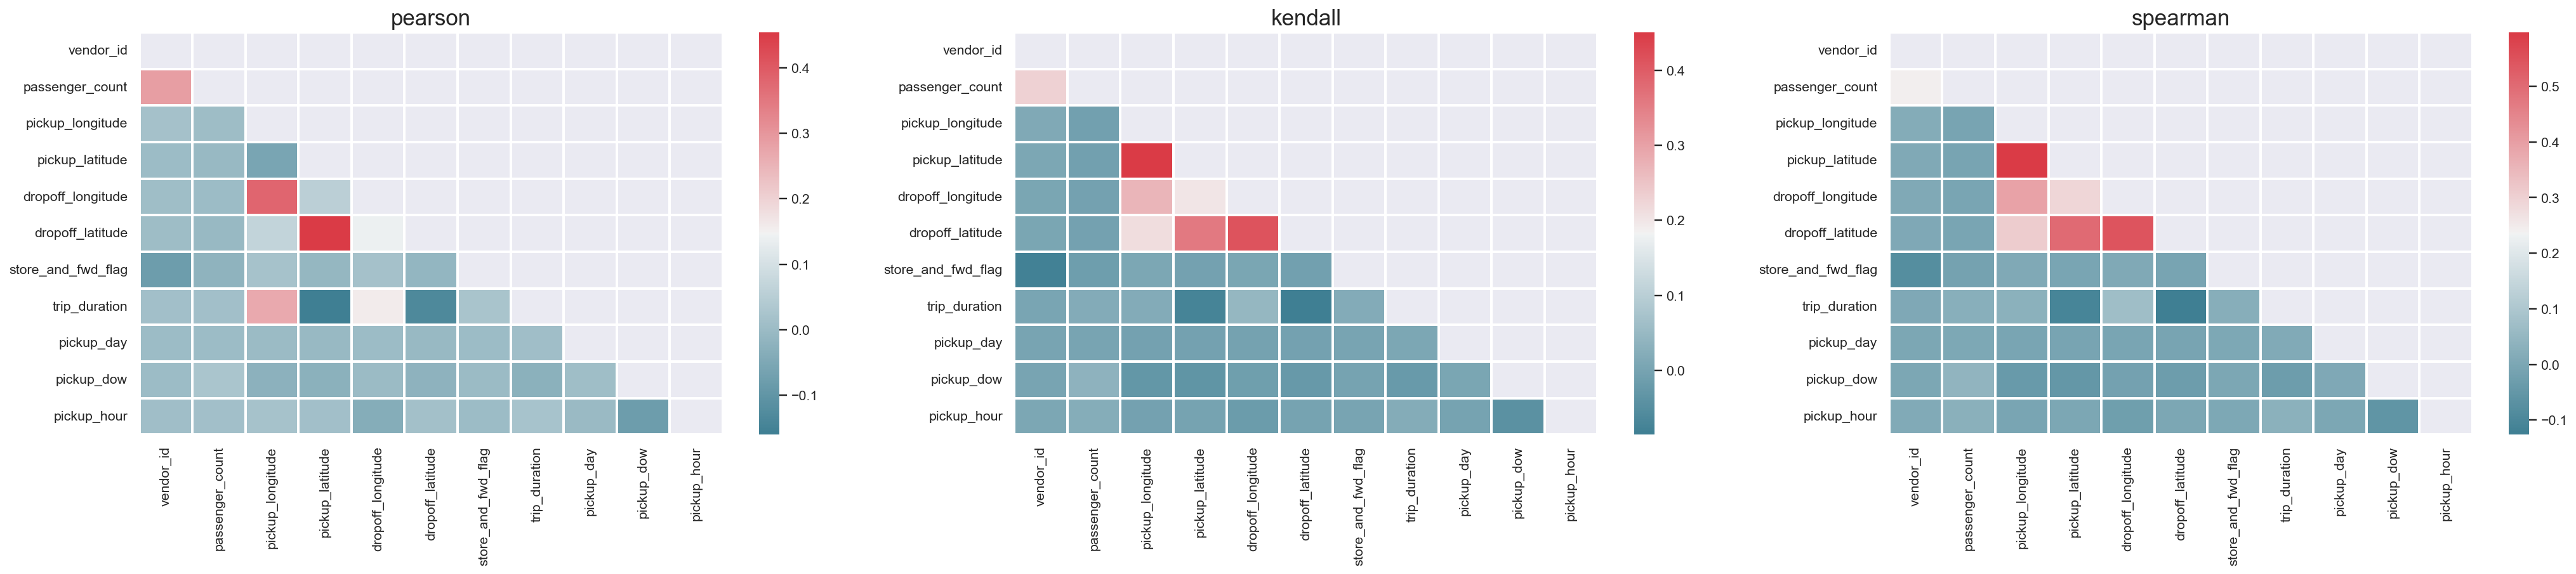

In [57]:
# Checking correlation

# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = train.dropna().corr(method=i)
# Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(correlation, dtype=bool))
# Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)
  sns.heatmap(correlation, mask = mask, cmap = cmap, linewidth = 2)
  plt.title(i, fontsize=18)

* The correlation plot shows that the strongest correlations are between `passenger_count` and `vendor_id`, `dropoff_longitude` and `pickup_longitude`, `dropoff_latitude` and `pickup_latitude`.

---
### Feature Engineering

**Knowing the distance between pickup and dropoff could be helpful in predicting the trip duration. This can be calculated using the haversine distance formula that uses the latitude and longitude coordinates to calculate the distance between the two places.**

In [58]:
def haversine(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [59]:
train['distance'] = haversine(train.pickup_latitude, train.pickup_longitude,
                                           train.dropoff_latitude, train.dropoff_longitude)
test['distance'] = haversine(test.pickup_latitude, test.pickup_longitude,
                                           test.dropoff_latitude, test.dropoff_longitude)

In [60]:
train.distance.describe()

count    543018.000000
mean          3.460875
std           4.398021
min           0.000000
25%           1.247133
50%           2.112514
75%           3.901750
max        1240.908677
Name: distance, dtype: float64

In [61]:
train.loc[:, 'avg_speed_h'] = train['distance'] / (train['trip_duration']/3600)

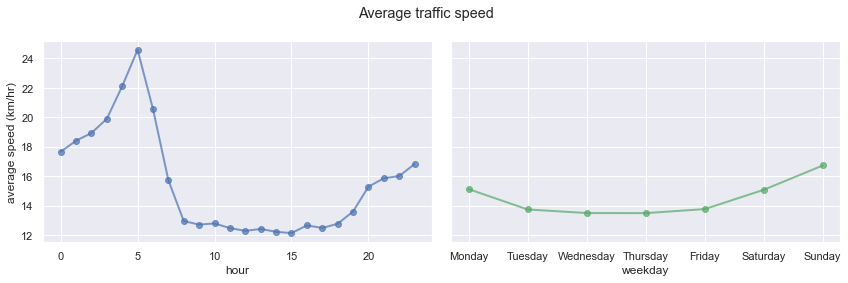

In [62]:
fig, ax = plt.subplots(figsize = (12,4), ncols=2, sharey=True)
ax[0].plot(train.groupby('pickup_hour').mean()['avg_speed_h'], 'bo-', lw=2, alpha=0.7)
ax[1].plot(train.groupby('pickup_dow').mean()['avg_speed_h'], 'go-', lw=2, alpha=0.7)

ax[0].set_xlabel('hour')
ax[1].set_xlabel('weekday')
ax[1].set_xticks([0,1,2,3,4,5,6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax[0].set_ylabel('average speed (km/hr)')
fig.suptitle('Average traffic speed')
fig.tight_layout()

* The hours 08:00 to 18:00 seem to be the work hours with more traffic and thus lower traffic speed.
* A new feature named work_hours can be introduced with its value as 1 during the work hours, from Monday to Friday, and 0 otherwise.

In [63]:
train['work_hours'] = ((train['pickup_hour'] >= 8) & (train['pickup_hour'] < 18) & (train['pickup_dow'].isin([0,1,2,3,4]))).astype(int)
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_dayow,pickup_dow,pickup_hour,distance,avg_speed_h,work_hours
469114,id2380741,2,2016-05-21 10:40:14,2016-05-21 10:51:11,1,-73.981796,40.762035,-73.972267,40.781265,0,657,21,Saturday,5,10,2.283879,12.514404,0
694852,id3946961,2,2016-01-08 18:49:27,2016-01-08 18:52:42,5,-73.980965,40.747677,-73.982704,40.741161,0,195,8,Friday,4,18,0.739163,13.646087,0
696324,id0833913,1,2016-05-22 00:54:10,2016-05-22 01:08:10,1,-73.951065,40.782722,-73.867691,40.833664,0,840,22,Sunday,6,0,9.018032,38.648710,0
356496,id1336849,1,2016-06-11 10:32:12,2016-06-11 10:38:50,1,-73.987625,40.762791,-73.973518,40.762909,0,398,11,Saturday,5,10,1.188159,10.747165,0
645318,id1610858,1,2016-04-03 10:45:51,2016-04-03 10:57:13,3,-73.964333,40.792503,-73.988609,40.758369,0,682,3,Sunday,6,10,4.311011,22.756069,0


## Evaluation metric

* The most suitable evaluation metric for trip duration would be RMSLE, as it wouldn't be affected by outliers.

In [64]:
def rmsle(evaluator,X,real):
    sum = 0.0
    predicted = evaluator.predict(X)
    #print("Number predicted less than 0: {}".format(np.where(predicted < 0)[0].shape))

    predicted[predicted < 0] = 0
    for x in range(len(predicted)):
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p-r)**2
    return (sum/len(predicted))**0.5

___
## Preparing Test Data

In [65]:
test.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_dayow,pickup_dow,pickup_hour,distance
409888,id3315205,1,2016-06-21 22:06:35,2016-06-21 22:19:19,1,-73.981903,40.765690,-73.996429,40.737450,N,764,21,Tuesday,1,22,3.370153
666838,id0273627,1,2016-01-29 08:50:01,2016-01-29 09:37:45,1,-73.963600,40.774395,-74.177101,40.695042,N,2864,29,Friday,4,8,20.036405
421168,id3291472,1,2016-03-30 12:36:29,2016-03-30 12:45:53,1,-73.991081,40.737411,-74.001083,40.746338,N,564,30,Wednesday,2,12,1.302023
348868,id2444699,1,2016-04-11 05:36:57,2016-04-11 05:44:28,1,-73.962936,40.766479,-73.979156,40.777626,N,451,11,Monday,0,5,1.844411
34687,id2159293,1,2016-01-01 02:52:32,2016-01-01 03:01:51,1,-73.976067,40.750446,-73.955841,40.771015,N,559,1,Friday,4,2,2.851819


In [66]:
test['store_and_fwd_flag'] = 1 * (test.store_and_fwd_flag.values == 'Y')

In [67]:
test['work_hours'] = ((test['pickup_hour'] >= 8) & (test['pickup_hour'] < 18) & (test['pickup_dow'].isin([0,1,2,3,4]))).astype(int)

In [68]:
test.loc[:, 'avg_speed_h'] = 1000 * test['distance'] / test['trip_duration']

In [69]:
test.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_dayow,pickup_dow,pickup_hour,distance,work_hours,avg_speed_h
409888,id3315205,1,2016-06-21 22:06:35,2016-06-21 22:19:19,1,-73.981903,40.765690,-73.996429,40.737450,0,764,21,Tuesday,1,22,3.370153,0,4.411195
666838,id0273627,1,2016-01-29 08:50:01,2016-01-29 09:37:45,1,-73.963600,40.774395,-74.177101,40.695042,0,2864,29,Friday,4,8,20.036405,1,6.995951
421168,id3291472,1,2016-03-30 12:36:29,2016-03-30 12:45:53,1,-73.991081,40.737411,-74.001083,40.746338,0,564,30,Wednesday,2,12,1.302023,1,2.308552
348868,id2444699,1,2016-04-11 05:36:57,2016-04-11 05:44:28,1,-73.962936,40.766479,-73.979156,40.777626,0,451,11,Monday,0,5,1.844411,0,4.089603
34687,id2159293,1,2016-01-01 02:52:32,2016-01-01 03:01:51,1,-73.976067,40.750446,-73.955841,40.771015,0,559,1,Friday,4,2,2.851819,0,5.101644


---

## Benchmark Model

---

In [70]:
# storing simple median in a new column in the test set as "simple_median"
test['median_duration'] = train['trip_duration'].median()
test.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_dayow,pickup_dow,pickup_hour,distance,work_hours,avg_speed_h,median_duration
409888,id3315205,1,2016-06-21 22:06:35,2016-06-21 22:19:19,1,-73.981903,40.765690,-73.996429,40.737450,0,764,21,Tuesday,1,22,3.370153,0,4.411195,666.0
666838,id0273627,1,2016-01-29 08:50:01,2016-01-29 09:37:45,1,-73.963600,40.774395,-74.177101,40.695042,0,2864,29,Friday,4,8,20.036405,1,6.995951,666.0
421168,id3291472,1,2016-03-30 12:36:29,2016-03-30 12:45:53,1,-73.991081,40.737411,-74.001083,40.746338,0,564,30,Wednesday,2,12,1.302023,1,2.308552,666.0
348868,id2444699,1,2016-04-11 05:36:57,2016-04-11 05:44:28,1,-73.962936,40.766479,-73.979156,40.777626,0,451,11,Monday,0,5,1.844411,0,4.089603,666.0
34687,id2159293,1,2016-01-01 02:52:32,2016-01-01 03:01:51,1,-73.976067,40.750446,-73.955841,40.771015,0,559,1,Friday,4,2,2.851819,0,5.101644,666.0


In [71]:
#calculating mean absolute error
from sklearn.metrics import mean_squared_error as MSE

median_rmsle = MSE(np.log(test['trip_duration']+1) , np.log(test['median_duration']+1), squared = False)
median_rmsle

0.7965105610441814

---

## KNN Model

---

In [72]:
train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int32
trip_duration                  int64
pickup_day                     int64
pickup_dayow                  object
pickup_dow                     int64
pickup_hour                    int64
distance                     float64
avg_speed_h                  float64
work_hours                     int32
dtype: object

In [73]:
# Seperating the object datatypes from the dataframe
data1 = train.select_dtypes(exclude = ['object', 'datetime'])
data1.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'pickup_dow', 'pickup_hour', 'distance',
       'avg_speed_h', 'work_hours'],
      dtype='object')

**Seperating dependent and independent variables**

In [74]:
#seperating independent and dependent variables
train_x = data1.drop(['trip_duration', 'avg_speed_h'], axis=1)
train_y = data1['trip_duration']
train_x.shape, train_y.shape

((543018, 12), (543018,))

In [75]:
# Seperating the object datatypes from the dataframe
data2 = test.select_dtypes(exclude = ['object', 'datetime'])
test_x = data2.drop(['trip_duration', 'median_duration', 'avg_speed_h'], axis=1)
test_y = data2['trip_duration']
test_x.shape, test_y.shape

((182331, 12), (182331,))

In [76]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [77]:
# Creating instance of KNN
knn = KNN(n_neighbors = 10)

# Fitting the model
cv = ShuffleSplit(n_splits=4, test_size=0.1, random_state=10)
score = cross_val_score(knn, train_x, np.ravel(train_y), cv=cv,scoring=rmsle)
score

array([0.44162558, 0.44000236, 0.44092562, 0.44213926])

In [78]:
score.mean()

0.44117320433876794

In [79]:
knn.fit(train_x, train_y)

KNeighborsRegressor(n_neighbors=10)

In [80]:
# Predicting over the Train Set and calculating MSE
test_predict = knn.predict(test_x)
k = mse(np.log(test_predict+1), np.log(test_y+1), squared = False)
print('Test RMSLE    ', k )

Test RMSLE     0.519649027522984


In [81]:
def Val_score(n_neighbors):
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []
  
    for i in n_neighbors:
    
    # 10 fold cross validation for every value of n_neighbor
      cv = ShuffleSplit(n_splits=4, test_size=0.1, random_state=10)
      score = cross_val_score(KNN(n_neighbors = i), train_x, np.ravel(train_y), cv=cv,scoring=rmsle)    
    # adding mean to avg list
      avg.append(score.mean())
    
    # adding standard deviation to std list
      std.append(score.std())
    
    return avg, std

In [82]:
n_neighbors = range(1,20)
mean, std = Val_score(n_neighbors)

Text(0.5, 1.0, 'Mean Validation score')

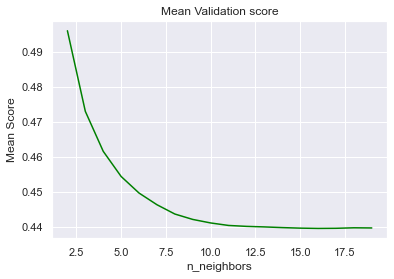

In [83]:
plt.plot(n_neighbors[1:20], mean[1:20], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

Text(0.5, 1.0, 'Standard Deviation of Validation score')

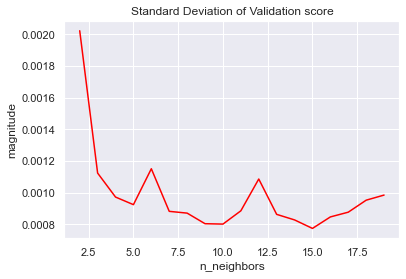

In [84]:
plt.plot(n_neighbors[1:20], std[1:20], color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

In [85]:
def Elbow(K):
  #initiating empty list
    test_rmsle = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(np.log(tmp+1),np.log(test_y+1), squared = False)
        test_rmsle.append(tmp)
    
    return test_rmsle

Text(0.5, 1.0, 'Elbow Curve for test')

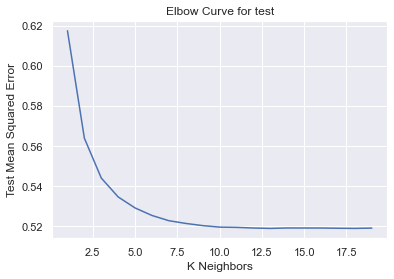

In [86]:
#Defining K range
k = range(1,20)
# calling above defined function
b = Elbow(k)
# plotting the Curves
plt.plot(k, b)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [87]:
# Creating instance of KNN with optimal value of K = 10 as it has low RMSLE for both train and test.
reg = KNN(n_neighbors = 10)

# Fitting the model
cv = ShuffleSplit(n_splits=4, test_size=0.1, random_state=10)
knn_train_score = cross_val_score(reg, train_x, np.ravel(train_y), cv=cv,scoring=rmsle)
knn_train_score = knn_train_score.mean()
print('Train RMSLE     ', knn_train_score)
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = reg.predict(test_x)
knn_test_score = mse(np.log(test_predict+1), np.log(test_y+1), squared = False)
print('Test RMSLE    ', knn_test_score)

Train RMSLE      0.44117320433876794
Test RMSLE     0.519649027522984


---

## Linear Regression

---

In [90]:
import sklearn
from sklearn.linear_model import LinearRegression as LR

In [91]:
# Creating instance of Linear Regression
lr = LR(normalize = True)

In [92]:
lr.fit(train_x,train_y)

LinearRegression(normalize=True)

In [93]:
cv = ShuffleSplit(n_splits=4, test_size=0.1, random_state=0)
lr_score = cross_val_score(lr, train_x, np.ravel(train_y), cv=cv, scoring=rmsle)
lr_score.mean()

0.5433030182199867

In [94]:
# Predicting over the train set and calculating the error
train_predict = lr.predict(train_x)
train_predict[train_predict<0] = 0

lr_train_score = mse(np.log(train_predict+1), np.log(train_y+1), squared = False)
print("Training RMSLE", lr_train_score)

Training RMSLE 0.5395718246312002


In [95]:
# Predicting over the Train Set and calculating F1
test_predict = lr.predict(test_x)
test_predict[test_predict<0] = 0

lr_test_score = mse(np.log(test_predict+1), np.log(test_y+1), squared = False)
print('Test RMSLE    ', lr_test_score)

Test RMSLE     0.6179021010187421


In [96]:
reg_data = pd.DataFrame({'coeff': lr.coef_, 'features': train_x.columns})
reg_data

,coeff,features
0,10.348246,vendor_id
1,4.337605,passenger_count
2,471.860923,pickup_longitude
3,-3156.478564,pickup_latitude
4,773.384686,dropoff_longitude
5,110.073430,dropoff_latitude
6,65.911018,store_and_fwd_flag
7,0.670932,pickup_day
8,12.044423,pickup_dow
9,6.992475,pickup_hour


**We can see from the coefficients that the latitudes, longitudes, distance and work_hours affect the trip_duration the most.**

In [97]:
from sklearn.linear_model import Ridge
alpha = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25]

In [98]:
# defining a function which will fit ridge regression model, plot the results, and return the coefficients
def ridge_regression(train_x, train_y, test_x, test_y, alpha):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(train_x,train_y)
    train_y_pred = ridgereg.predict(train_x)
    test_y_pred = ridgereg.predict(test_x)
    train_y_pred[train_y_pred<0] = 0
    test_y_pred[test_y_pred<0] = 0

    
    #Return the result in pre-defined format
    k1 = mse(np.log(train_y_pred+1), np.log(train_y+1), squared = False)
    ret = [k1]
    
    k2 = mse(np.log(test_y_pred+1), np.log(test_y+1), squared = False)
    ret.extend([k2])
    
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    
    return ret

In [99]:
ind = ['alpha_%.2g'%alpha[i] for i in range(0,10)]
rmsle_matrix_ridge = pd.DataFrame(index = ind, columns = ['train_rmsle', 'test_rmsle', 'intercept'] + ['coef_Var_%d'%i for i in range(1,13)])

In [100]:
for i in range(10):
    rmsle_matrix_ridge.iloc[i,] = ridge_regression(train_x, train_y, test_x, test_y, alpha[i])

In [101]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.5g}'.format
rmsle_matrix_ridge

,train_rmsle,test_rmsle,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12
alpha_0,0.53957,0.6179,2.165e+05,10.348,4.3376,471.86,"-3,156.5",773.38,110.07,65.911,0.67093,12.044,6.9925,99.695,266.54
alpha_1e-08,0.53957,0.6179,2.165e+05,10.348,4.3376,471.86,"-3,156.5",773.38,110.07,65.911,0.67093,12.044,6.9925,99.695,266.54
alpha_0.0001,0.53959,0.61792,2.1655e+05,10.347,4.3376,472.44,"-3,156",773.44,109.52,65.922,0.67089,12.039,6.991,99.682,266.5
alpha_0.001,0.53975,0.61809,2.1699e+05,10.339,4.3375,477.67,"-3,151.5",773.9,104.59,66.02,0.67051,11.992,6.9778,99.564,266.09
alpha_0.01,0.54138,0.6198,2.2124e+05,10.256,4.3358,528.41,"-3,107.4",778.45,56.718,66.971,0.66672,11.534,6.8488,98.406,262.1
alpha_1,0.63811,0.71384,2.7084e+05,6.3815,3.0161,"1,481.5","-1,538.5",840.06,-878.95,77.417,0.39124,-1.2556,2.1725,47.15,103.31
alpha_5,0.71733,0.78836,1.3127e+05,2.6802,1.1992,754.56,-597.8,434.3,-446.58,37.945,0.14431,-1.4823,0.53134,16.49,30.804
alpha_10,0.74064,0.81027,"77,840",1.5507,0.68291,447.85,-341.2,260.75,-262.9,22.488,0.080758,-0.92165,0.26781,9.1729,16.419
alpha_20,0.75583,0.82452,"43,032",0.8411,0.36698,246.01,-183.69,144.27,-143.62,12.349,0.042953,-0.51522,0.13374,4.8665,8.488
alpha_25,0.75924,0.82775,"35,246",0.68445,0.29805,200.7,-149.25,117.88,-117.02,10.075,0.034807,-0.42158,0.1069,3.9418,6.8366


In [102]:
#Importing Lasso model from sklearn's linear_model module
from sklearn.linear_model import Lasso

In [103]:
alpha_lasso = [0, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

In [104]:
# defining a function which will fit lasso regression model, plot the results, and return the coefficients
def lasso_regression(train_x, train_y, test_x, test_y, alpha):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True)
    lassoreg.fit(train_x,train_y)
    train_y_pred = lassoreg.predict(train_x)
    test_y_pred = lassoreg.predict(test_x)
    train_y_pred[train_y_pred<0] = 0
    test_y_pred[test_y_pred<0] = 0

    
    #Return the result in pre-defined format
    k1 = mse(np.log(train_y_pred+1), np.log(train_y+1), squared = False)
    ret = [k1]
    
    k2 = mse(np.log(test_y_pred+1), np.log(test_y+1), squared = False)
    ret.extend([k2])
    
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    
    return ret

In [105]:
rmsle_matrix_lasso = pd.DataFrame(index = ind, columns = ['train_rmsle', 'test_rmsle', 'intercept'] + ['coef_Var_%d'%i for i in range(1,13)])

In [106]:
for i in range(10):
    rmsle_matrix_lasso.iloc[i,] = lasso_regression(train_x, train_y, test_x, test_y, alpha_lasso[i])

In [107]:
rmsle_matrix_lasso

,train_rmsle,test_rmsle,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12
alpha_0,0.53957,0.6179,2.165e+05,10.348,4.3376,471.86,"-3,156.5",773.38,110.07,65.911,0.67093,12.044,6.9925,99.695,266.54
alpha_1e-08,0.53957,0.6179,2.165e+05,10.348,4.3376,471.86,"-3,156.5",773.38,110.07,65.911,0.67093,12.044,6.9925,99.695,266.54
alpha_0.0001,0.53957,0.6179,2.165e+05,10.348,4.3376,471.86,"-3,156.5",773.38,110.07,65.911,0.67093,12.044,6.9925,99.695,266.54
alpha_0.001,0.53957,0.6179,2.1649e+05,10.336,4.3335,471.86,"-3,156.1",773.27,109.67,65.809,0.67009,12.037,6.9908,99.693,266.51
alpha_0.01,0.53959,0.61792,2.1641e+05,10.223,4.2963,471.88,"-3,152.3",772.22,106.09,64.887,0.66253,11.975,6.9759,99.677,266.23
alpha_1,0.53974,0.6181,2.156e+05,9.098,3.9247,472.03,"-3,115.1",761.76,70.235,55.667,0.58693,11.349,6.8265,99.512,263.42
alpha_5,0.5421,0.62043,1.9629e+05,0,0.023554,437.87,"-2,875.1",627.27,-0,0,0,5.1081,5.3195,98.384,235.24
alpha_10,0.77474,0.8422,847.08,0,0,0,-0,0,-0,0,0,-0,0,0,0
alpha_20,0.77474,0.8422,847.08,0,0,0,-0,0,-0,0,0,-0,0,0,0
alpha_25,0.77474,0.8422,847.08,0,0,0,-0,0,-0,0,0,-0,0,0,0


___
## Decision Tree

In [108]:
from sklearn.tree import DecisionTreeRegressor as DT
dreg = DT()

In [109]:
dreg = dreg.fit(train_x,np.ravel(train_y))

In [110]:
train_predict = dreg.predict(train_x)

dt_train_score = mse(np.log(train_predict+1), np.log(train_y+1), squared = False)
print('Train RMSLE    ', dt_train_score)

Train RMSLE     0.0015605166604175274


In [111]:
test_predict = dreg.predict(test_x)

dt_test_score = mse(np.log(test_predict+1), np.log(test_y+1), squared = False)
print('Test RMSLE    ',dt_test_score)

Test RMSLE     0.568099778720311


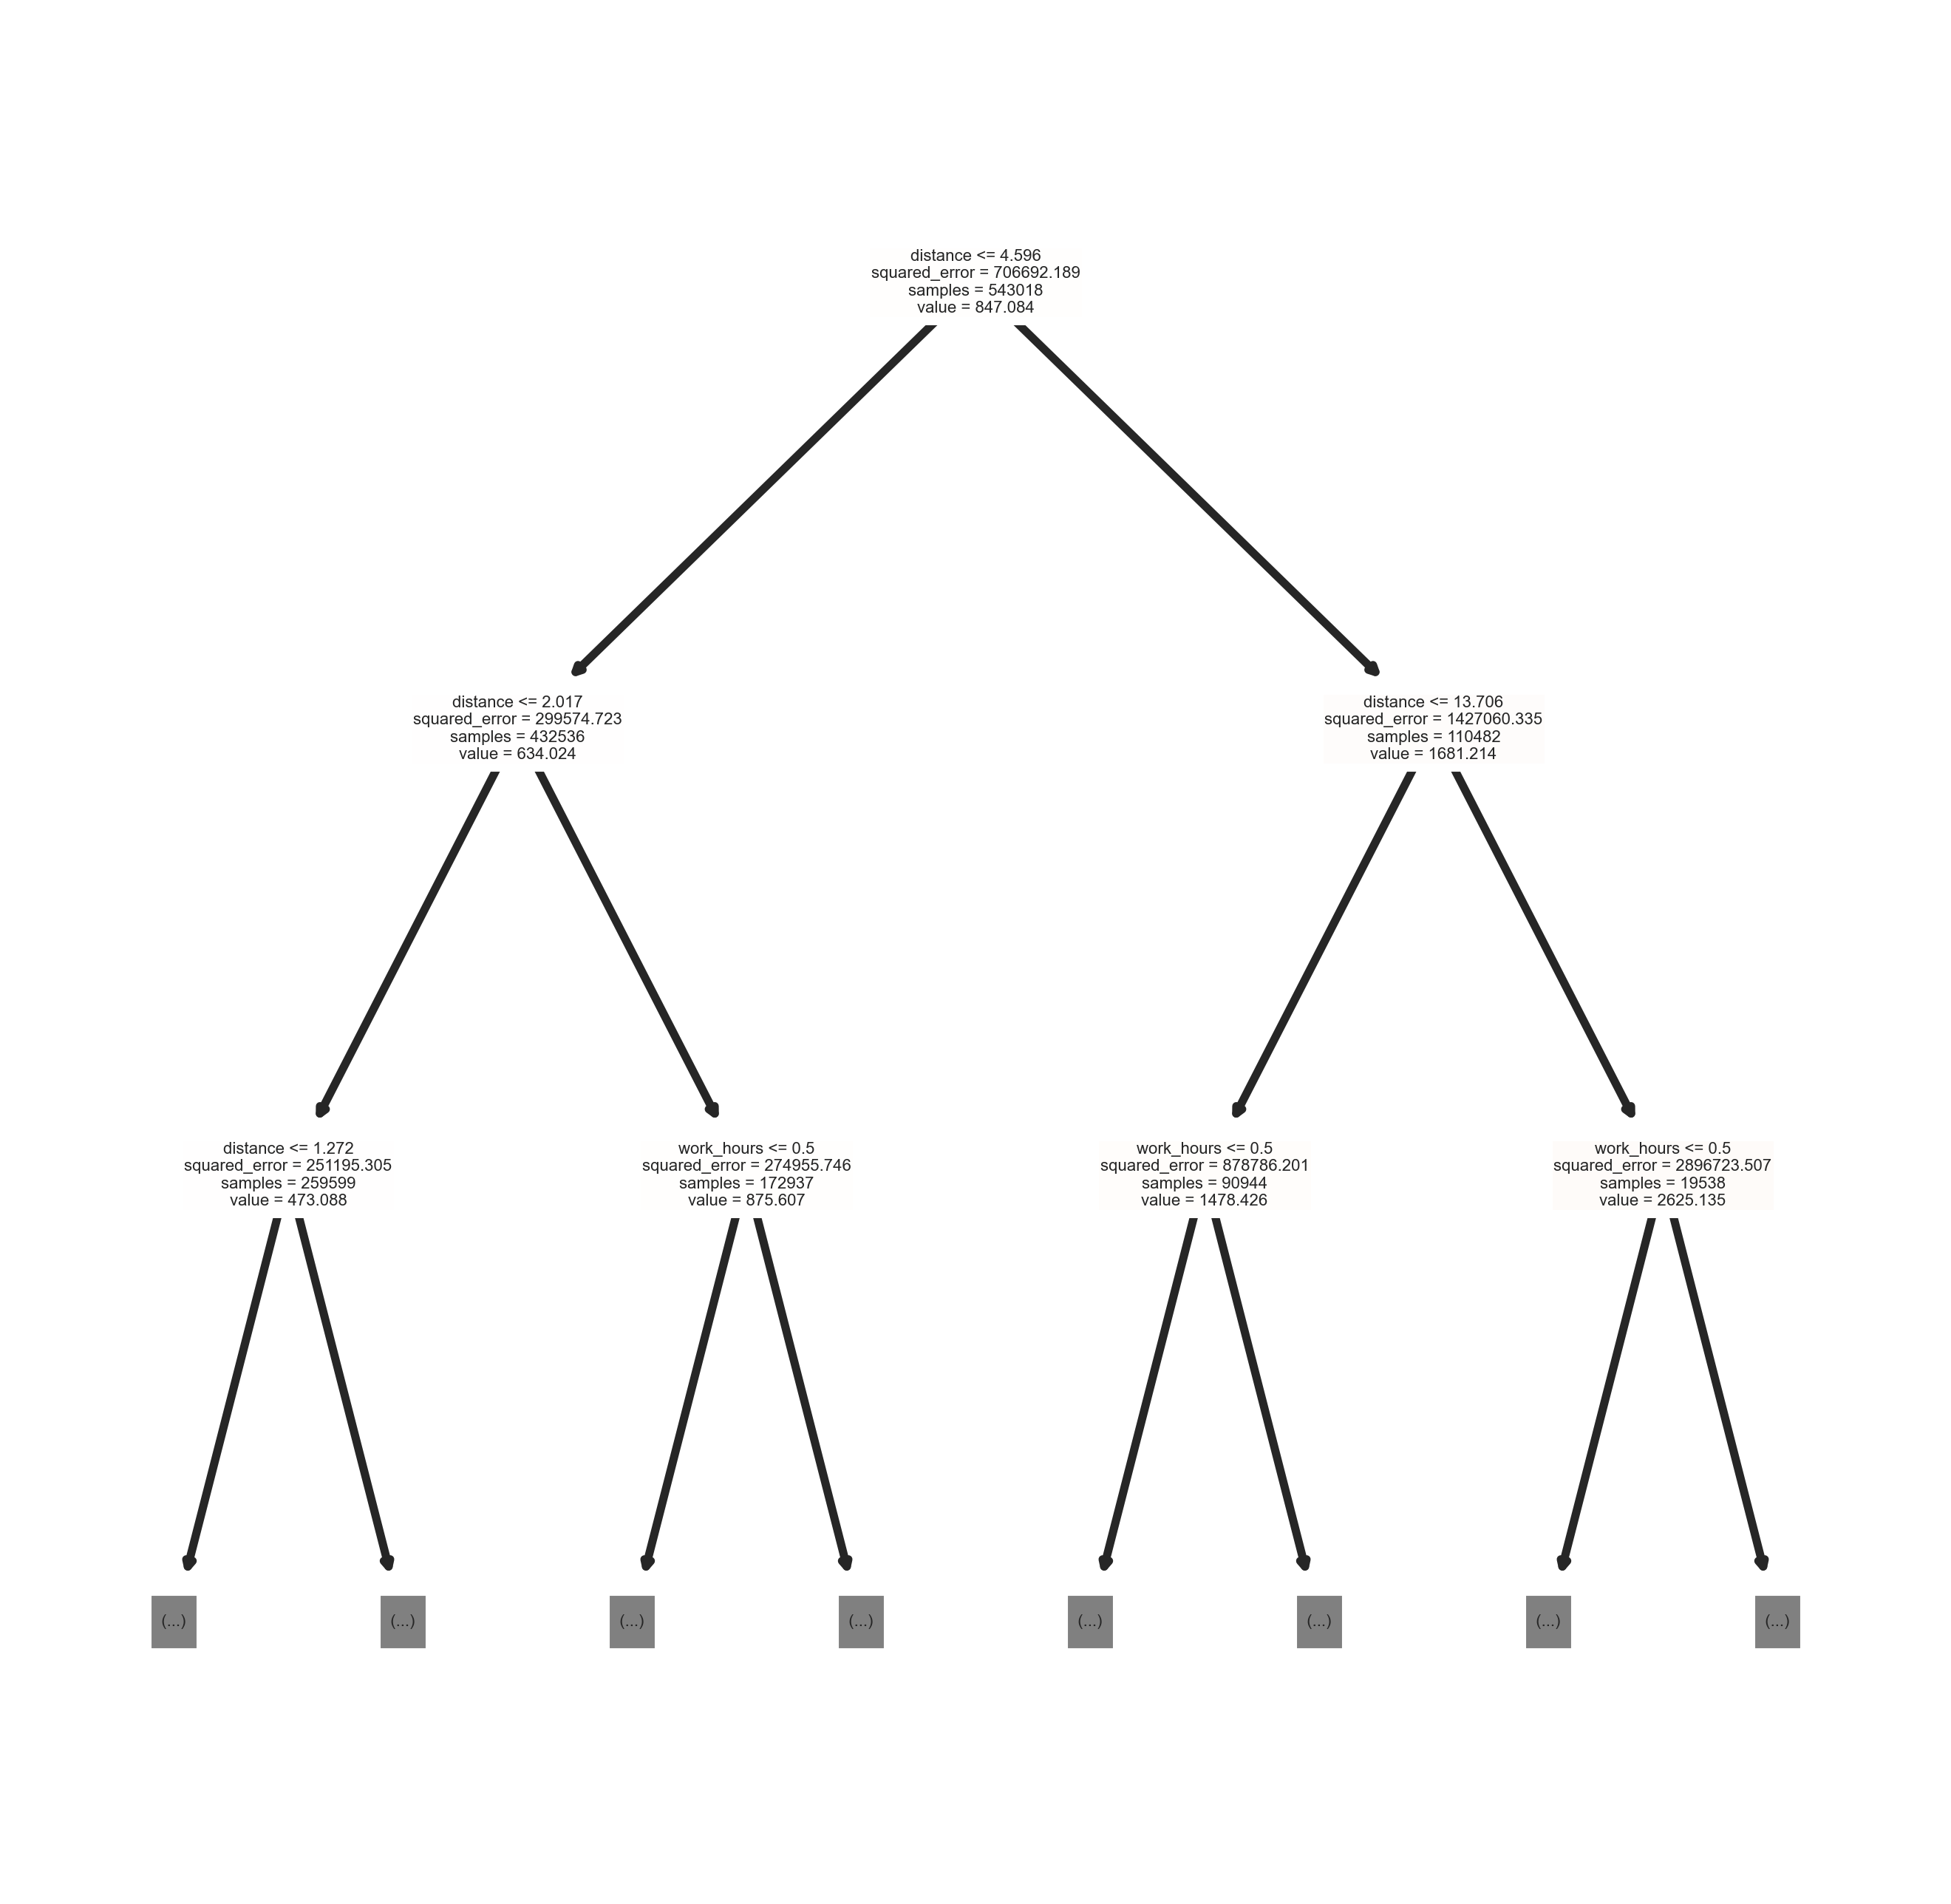

In [112]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(dreg,
               feature_names = train_x.columns, 
               max_depth = 2,
               filled = True);

* We can see from the decision tree that the distance and work_hours are the two most important features to predict the trip_duration.

---

## Random Forest

---

In [116]:
from sklearn.ensemble import RandomForestRegressor as RF
rf = RF()
cv = ShuffleSplit(n_splits=4, test_size=0.1, random_state=0)
rf_score = cross_val_score(rf, train_x, np.ravel(train_y), cv=cv,scoring=rmsle)
rf_score.mean()

0.36326167406351806

In [117]:
rf = rf.fit(train_x,np.ravel(train_y))

In [118]:
train_predict = rf.predict(train_x)

rf_train_score = mse(np.log(train_predict+1), np.log(train_y+1), squared = False)
print('Train RMSLE    ', rf_train_score)

Train RMSLE     0.15588947391892835


In [119]:
test_predict = rf.predict(test_x)

rf_test_score = mse(np.log(test_predict+1), np.log(test_y+1), squared = False)
print('Test RMSLE    ',rf_test_score)

Test RMSLE     0.4803150083992271


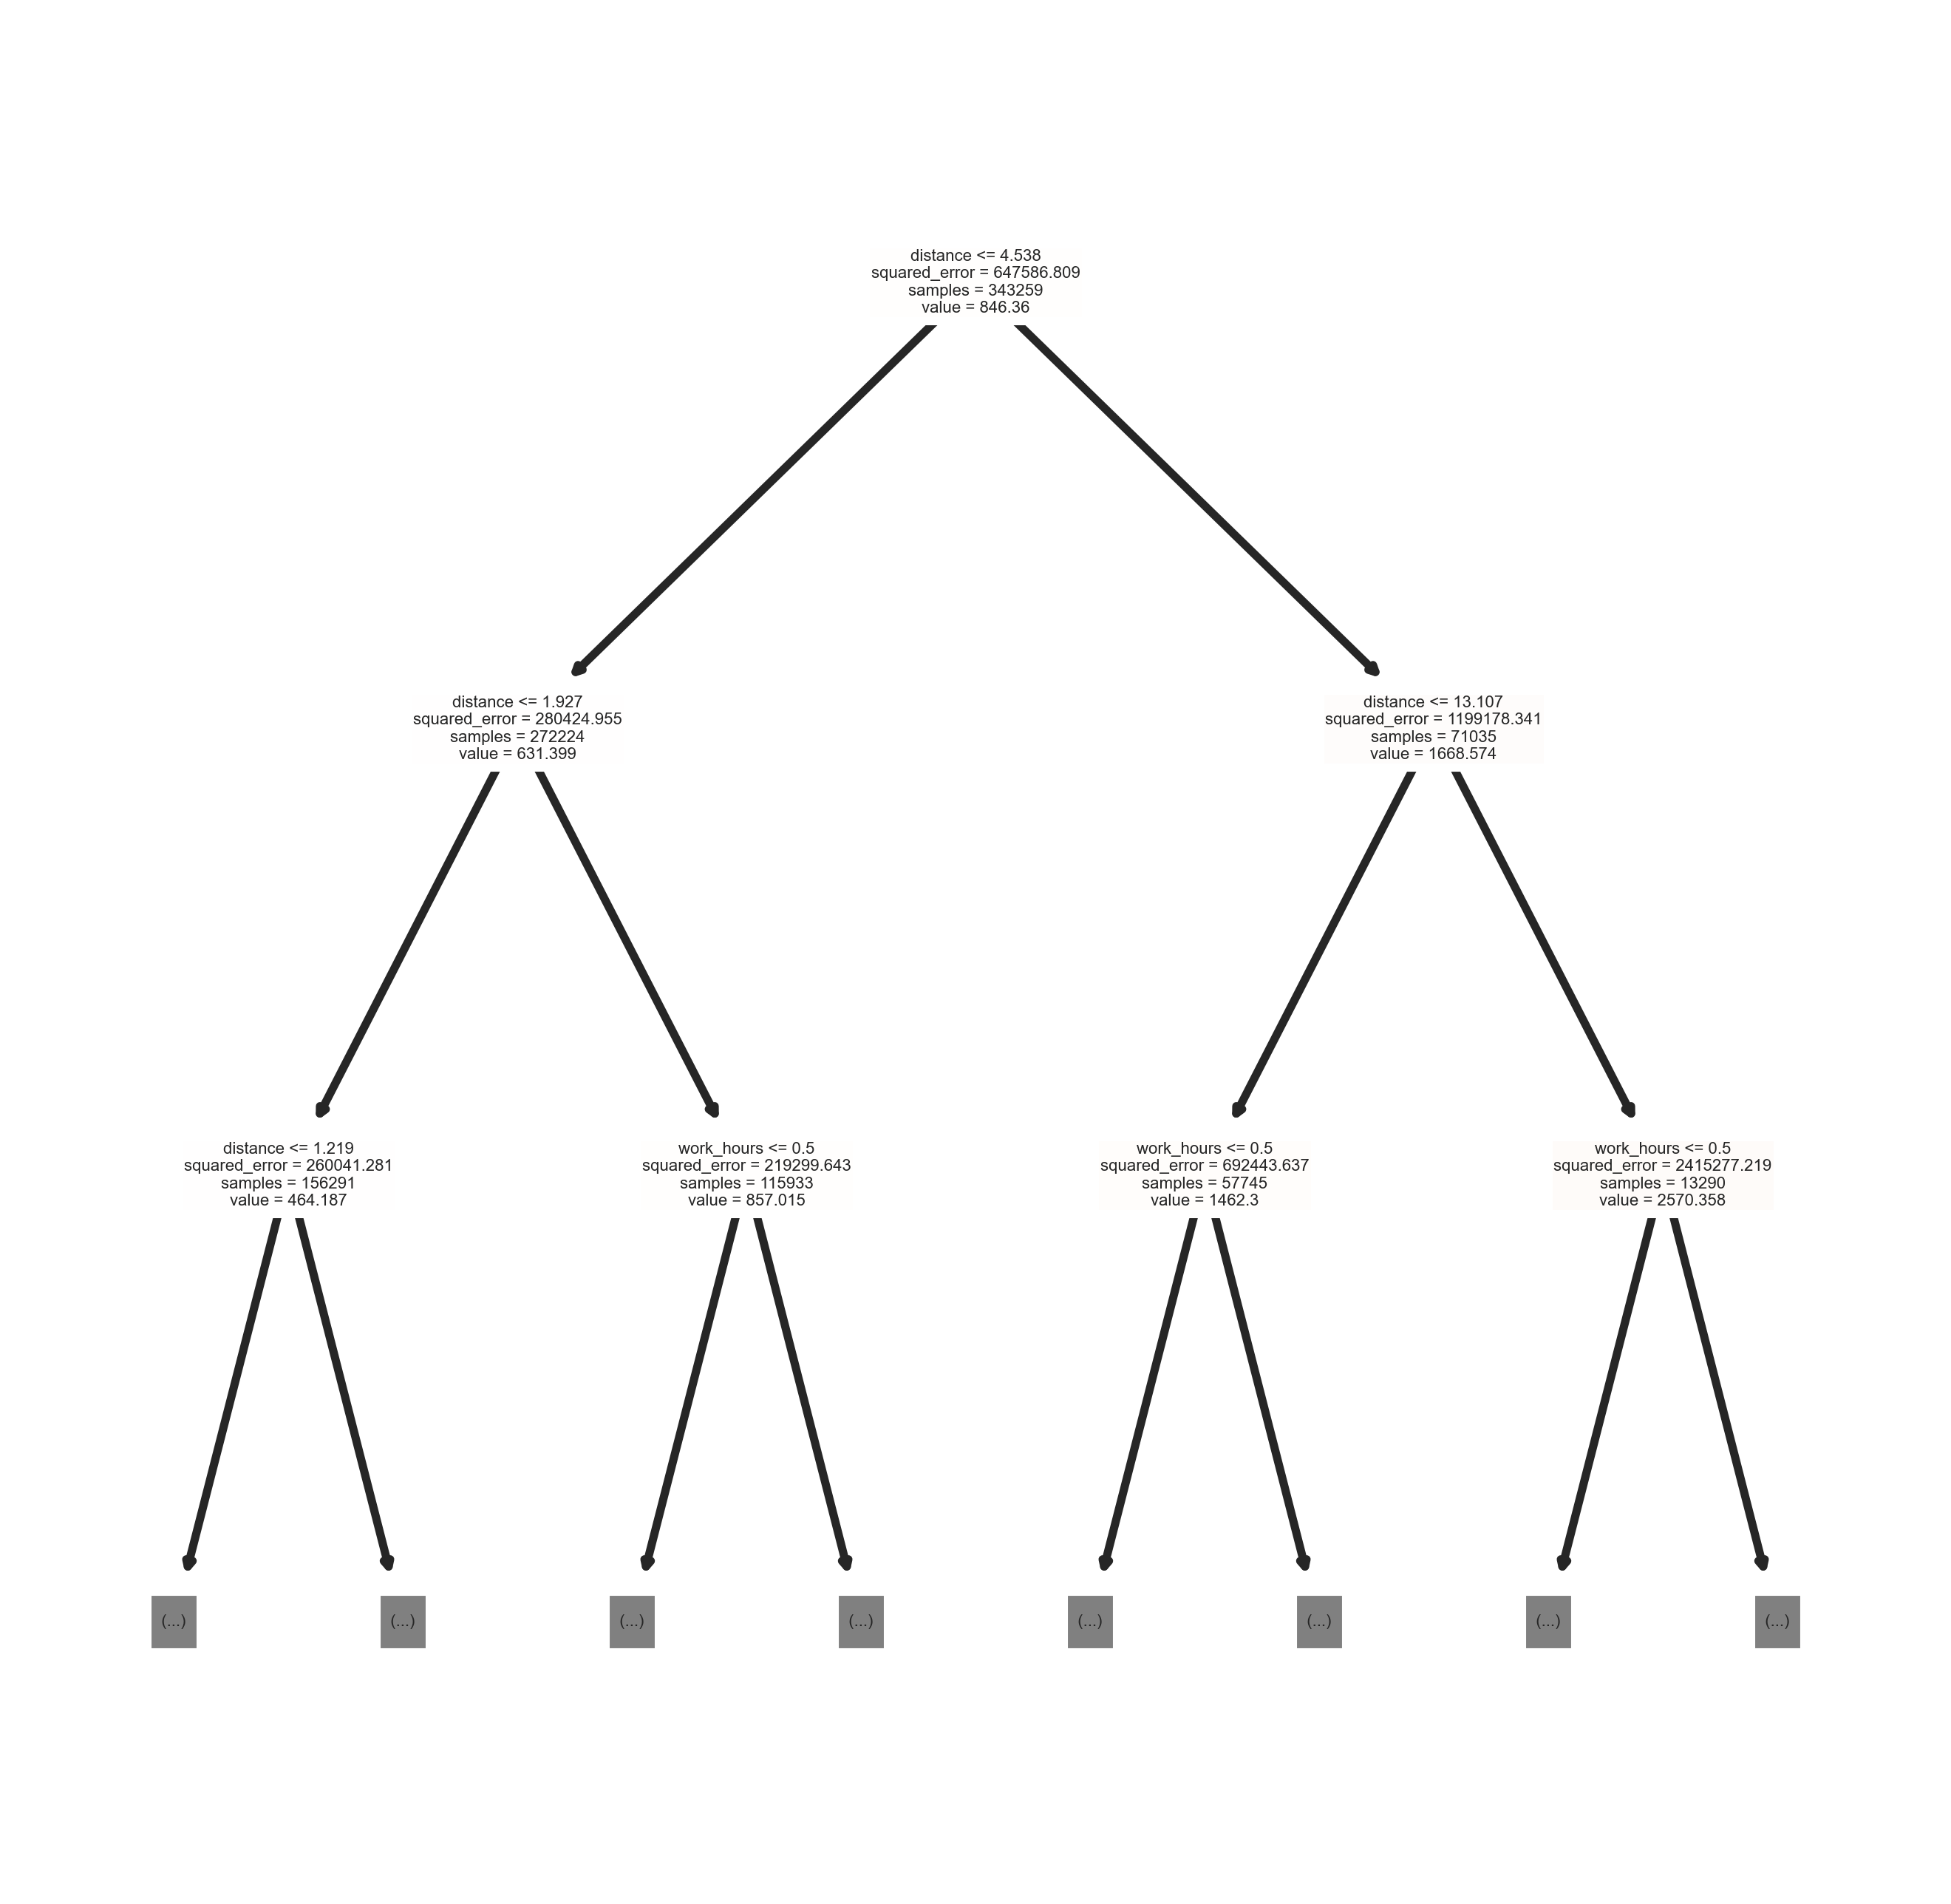

In [120]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = train_x.columns, 
               max_depth = 2,
               filled = True);


In [121]:
result = pd.DataFrame(data  = {'Model' : ['KNN', 'Linear Reg', 'Decision Tree', 'Random Forest'], 
                                'train_RMSLE': [knn_train_score, lr_train_score, dt_train_score, rf_train_score],
                                'test_RMSLE': [knn_test_score, lr_test_score, dt_test_score, rf_test_score]})
result

,Model,train_RMSLE,test_RMSLE
0,KNN,0.44117,0.51965
1,Linear Reg,0.53957,0.6179
2,Decision Tree,0.0015605,0.5681
3,Random Forest,0.15589,0.48032


In [122]:
tidy = result.melt(id_vars='Model').rename(columns=str.title)
tidy

,Model,Variable,Value
0,KNN,train_RMSLE,0.44117
1,Linear Reg,train_RMSLE,0.53957
2,Decision Tree,train_RMSLE,0.0015605
3,Random Forest,train_RMSLE,0.15589
4,KNN,test_RMSLE,0.51965
5,Linear Reg,test_RMSLE,0.6179
6,Decision Tree,test_RMSLE,0.5681
7,Random Forest,test_RMSLE,0.48032


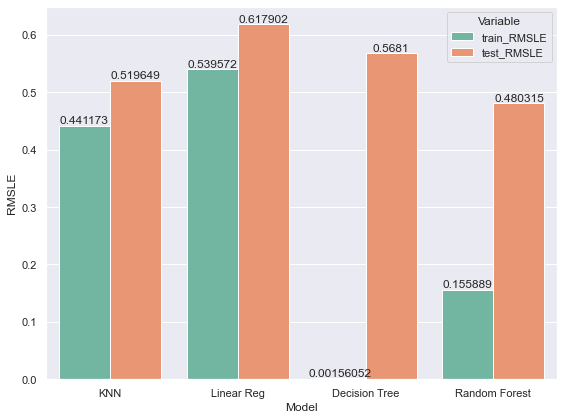

In [123]:
fig,ax = plt.subplots(figsize = (8,6))
sns.barplot(x = 'Model', y = 'Value', hue = 'Variable', data = tidy, palette = 'Set2')
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])
ax.set_ylabel('RMSLE')

fig.tight_layout()

* We can see from the results that decision tree model gives the lowest RMSLE for our training data among other models but a higher RMSLE than KNN and Random Forest for the test data. This is because the models overfits to the training data and hence does not perform very well on the test data.
* The best model among the four would be the Random Forest model as it gives very low RMSLE for training data and the lowest RMSLE for the test data.